# Lecture 0: Dynamical models

In [2]:
import numpy as np
import networkx as nx

In [3]:
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

**New modules!** [tqdm](https://github.com/tqdm/tqdm) permits to check nicely how fast is your loop running:

In [4]:
from tqdm import notebook

In [5]:
import networkx as nx

Actually, networkx is for kidz... [igraph](https://igraph.org/python/) here is able to handle more or less everything!

In [6]:
import igraph as ig

[Cairocffi](https://cairocffi.readthedocs.io/en/stable/) is needed in order to plot with igraph (we won't do it during the lecture, but you better know it)

In [7]:
import cairocffi

## Basic properties of Hep-th network
Hep-th is the categories in arXiv devoted to theoretical (th) papers in High Energy Physics (HEP). The present network represents the co-authorship of various scholars:
![](../Images/hep_th_net.png)

### Loading data

In [8]:
data=np.genfromtxt('../Data/ca-HepTh.txt', skip_header=2, dtype='i8')-1

In [9]:
len(data)

51971

In [10]:
vertices=np.unique(data)

In [11]:
lv=len(vertices)

In [447]:
le=len(data)

### Define the network

In [13]:
hep_th_nx=nx.Graph()
hep_th_nx.add_edges_from(data)

Do not draw it! The network is too big to be plotted in a time compatible with the length of the lectures. In this cases:
1. use GePhi to plot your network;
2. use python igraph (a little more involved in the installation).

For the present goal we can study the network without showing it, illustrating some smaller example.

#### Degree distribution

In [15]:
hep_th_nx.degree()

DegreeView({0: 3, 49153: 2, 10923: 1, 32772: 7, 49160: 2, 32779: 2, 49164: 8, 49165: 2, 15: 9, 65552: 23, 49171: 7, 49172: 2, 49173: 2, 58376: 1, 49175: 2, 49176: 2, 65561: 11, 16410: 17, 49180: 6, 16413: 6, 16414: 2, 32799: 18, 65569: 4, 65570: 1, 32803: 1, 49189: 4, 38: 2, 16423: 1, 33934: 3, 16426: 3, 43: 1, 44: 1, 32813: 12, 32814: 2, 32816: 1, 65585: 8, 16434: 3, 43699: 9, 5471: 2, 65596: 2, 65598: 1, 32831: 10, 32832: 31, 32833: 1, 16450: 6, 49219: 2, 16452: 2, 32837: 7, 16454: 8, 54625: 1, 49224: 6, 65614: 3, 19095: 2, 65616: 4, 65617: 3, 65618: 2, 16467: 1, 65620: 5, 65621: 1, 65623: 3, 65624: 3, 65625: 2, 65626: 6, 32859: 3, 16476: 1, 32862: 1, 32863: 2, 96: 30, 65633: 3, 16482: 4, 49253: 15, 51900: 6, 59470: 38, 65646: 2, 16495: 23, 32880: 12, 65649: 3, 65650: 1, 115: 14, 10942: 7, 62825: 2, 27327: 4, 65660: 4, 65661: 2, 4: 2, 16511: 2, 128: 1, 31851: 4, 131: 2, 135: 7, 16520: 11, 16521: 3, 139: 3, 27330: 6, 49294: 36, 38253: 2, 32912: 1, 49298: 12, 32915: 1, 49300: 1, 8358: 

In [16]:
hep_th_k=np.array(hep_th_nx.degree())

In [17]:
hep_th_kk=np.unique(hep_th_k[:,1], return_counts=True)

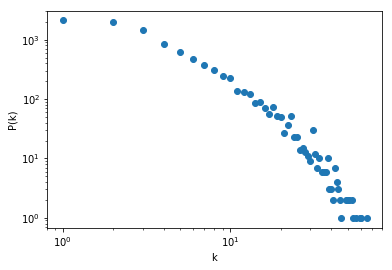

In [18]:
plt.scatter(hep_th_kk[0], hep_th_kk[1])
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Clustering coefficient

In [19]:
hep_th_clust=nx.average_clustering(hep_th_nx)

In [20]:
print(hep_th_clust)

0.47143905296693306


In [21]:
%timeit nx.average_clustering(hep_th_nx)

451 ms ± 797 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Average Shortest Path Length

In [22]:
nx.average_shortest_path_length(hep_th_nx)

NetworkXError: Graph is not connected.

In [23]:
hep_th_nx_lcc=max(nx.connected_components(hep_th_nx), key=len)
hep_th_nx_lcc=hep_th_nx.subgraph(hep_th_nx_lcc).copy()

In [24]:
print(hep_th_nx.number_of_nodes())
print(hep_th_nx_lcc.number_of_nodes())

9877
8638


**!!!DO NOT EVALUATE!!!**
The Average Shortest Path Length is an heavy calculation and it takes a long time.

In [377]:
nx.average_shortest_path_length(hep_th_nx_lcc)

5.945432380163172

In [378]:
%timeit nx.average_shortest_path_length(hep_th_nx_lcc)

KeyboardInterrupt: 

## Regular graphs

In [196]:
lv

9877

In [238]:
cacca=nx.random_regular_graph(4, 6)

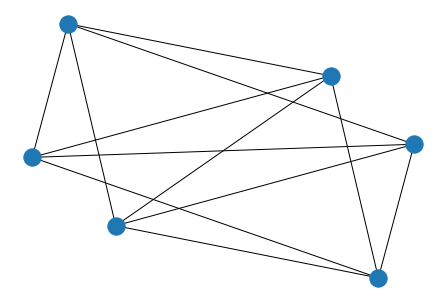

In [239]:
nx.draw_kamada_kawai(cacca)

In [274]:
cacca=nx.circulant_graph(10, [1,2,3])

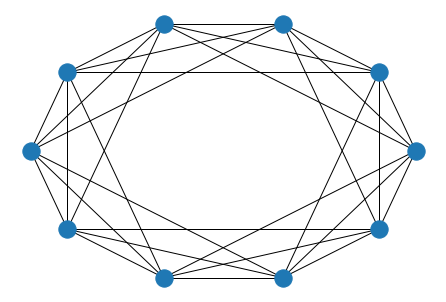

In [296]:
nx.draw_kamada_kawai(cacca)

In [276]:
regular=nx.random_regular_graph(5, lv)

NetworkXError: n * d must be even

D'oh!

In [407]:
regular_total=nx.random_regular_graph(6, lv)

In [406]:
circular_total=nx.circulant_graph(lv, [1,2,3])

Basic properties:

In [408]:
regular_total.number_of_nodes()

9877

In [409]:
circular_total.number_of_nodes()

9877

In [410]:
regular_total.number_of_edges()

29631

In [411]:
circular_total.number_of_edges()

29631

In [412]:
hep_th_nx.number_of_edges()

25998

The number of edges of the real network is a little smaller, as expected.

### A smaller example

Let us focus on smaller graph, in order to have a direct understanding of the properties of the systems in a proper amount of time.

In [46]:
smaller_example_size=500

In [489]:
smaller_regular=nx.random_regular_graph(6, smaller_example_size)

In [490]:
smaller_circular=nx.circulant_graph(smaller_example_size, [1,2,3])

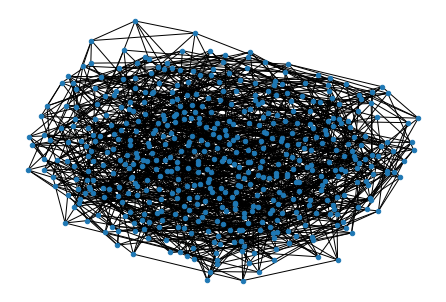

In [491]:
nx.draw(smaller_regular, node_size=20)

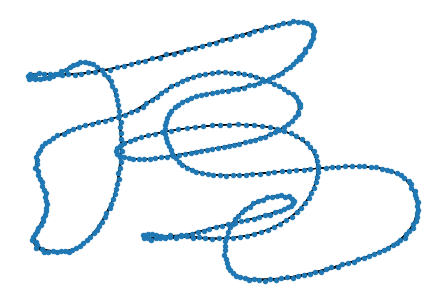

In [492]:
nx.draw(smaller_circular, node_size=20)

#### Degree distribution

In [493]:
reg_k=np.array(smaller_regular.degree())

In [494]:
np.unique(reg_k[:, 1])

array([6])

In [495]:
cir_k=np.array(smaller_circular.degree())

In [496]:
np.unique(cir_k[:, 1])

array([6])

#### Clustering coefficient

The average clustering is completely different in the two cases.

In [501]:
smaller_regular_c=nx.average_clustering(smaller_regular)
print(smaller_regular_c)

0.00800000000000001


In [502]:
smaller_circular_c=nx.average_clustering(smaller_circular)
print(smaller_circular_c)

0.5999999999999999


#### Average Shortest Path Length

The same is true for the Average Shortest Path Length...

In [506]:
smaller_regular_apl=nx.average_shortest_path_length(smaller_regular)
print(smaller_regular_apl)

3.748256513026052


In [507]:
smaller_circular_apl=nx.average_shortest_path_length(smaller_circular)
print(smaller_circular_apl)

42.08416833667334


## Erdos-Renyi

### Let's implement our own Erdos-Renyi (a la Solomonoff)

Actually there is a numpy submodule generating random numbers, that is call (surprise surprise) random

In [38]:
from numpy import random

rand returns a random number in the interval (0,1) when it has no argument...

In [1269]:
random.rand()

0.4002583425966211

...otherwise:

In [1270]:
random.rand(42)

array([0.44722195, 0.61387891, 0.52961251, 0.10785409, 0.2418602 ,
       0.53968105, 0.6020902 , 0.63205939, 0.78948765, 0.19352009,
       0.32984275, 0.38670292, 0.20303915, 0.61862112, 0.80863761,
       0.26140111, 0.11939441, 0.90261073, 0.72282305, 0.15971424,
       0.51615747, 0.27773487, 0.47437873, 0.32126605, 0.24181851,
       0.82329036, 0.15884131, 0.62880084, 0.1654295 , 0.33124657,
       0.61298879, 0.45462264, 0.81739413, 0.50298387, 0.32400838,
       0.89284006, 0.92566233, 0.64460989, 0.09559025, 0.90799336,
       0.19802612, 0.1542388 ])

In [471]:
max_link_number=int(lv*(lv-1)/2)

In [456]:
max_link_number

48772626

In [457]:
le/lv

5.261820390806925

The Erdos-Renyi probability

In [465]:
p_er=le/max_link_number

In [466]:
p_er

0.001065577235886376

In order to take track of the progress, let's use tqdm!

>tqdm means "progress" in Arabic (taqadum, تقدّم) and is an abbreviation for "I love you so much" in Spanish (te quiero demasiado).

--- tqdm repository

#### Different approaches

Sampling time after time...

In [413]:
edge_list_er=[]
v_counter=0

for v in notebook.tqdm(range(lv-1)):
    for w in range(v+1, lv):
        if random.rand()<p_er:
            edge_list_er.append((v, w))
        v_counter+=1

...or sampling everything at the very beginning?

In [422]:
edge_list_er=[]
v_counter=0
er_mask=random.rand(max_link_number)<p_er
for v in notebook.tqdm(range(lv-1)):
    for w in range(v+1, lv):
        if er_mask[v_counter]:
            edge_list_er.append((v, w))
        v_counter+=1

Actually tqdm already told us who's the faster one, but, for completeness, let's check the time taken for the two cases.

In [423]:
def mask_vec():
    edge_list_er=[]
    v_counter=0
    er_mask=random.rand(max_link_number)<p_er
    for v in range(lv-1):
        for w in range(v+1, lv):
            if er_mask[v_counter]:
                edge_list_er.append((v, w))
            v_counter+=1

In [424]:
def random_vec():
    edge_list_er=[]
    v_counter=0
    
    for v in range(lv-1):
        for w in range(v+1, lv):
            if random.rand()<p_er:
                edge_list_er.append((v, w))
            v_counter+=1

In [425]:
%timeit mask_vec()

6.51 s ± 5.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [426]:
%timeit random_vec()

25.2 s ± 35.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The mask method wins!

### Let's focus on a smaller example

In [460]:
smaller_example_size

500

Let's use a probability per link such that the average degree is fixed to 6 (as in the previous cases). 

In [464]:
p_er_smaller=6/(smaller_example_size-1)

In [467]:
p_er_smaller

0.012024048096192385

In [468]:
p_er

0.001065577235886376

Actually, there is a difference of an order of magnitude

In [470]:
smaller_max_link_number=int(smaller_example_size*(smaller_example_size-1)/2)

#### Degree distribution

In [472]:
    counter=0
    s_er=nx.Graph()
    er_mask=random.rand(smaller_max_link_number)<p_er_smaller
    for v in notebook.tqdm(range(smaller_example_size-1)):
        for w in range(v+1, smaller_example_size):
            if er_mask[counter]:
                s_er.add_edge(v, w)
            counter+=1

In [473]:
s_er_k=np.array(s_er.degree())

In [474]:
s_er_kk=np.unique(s_er_k[:,1], return_counts=True)

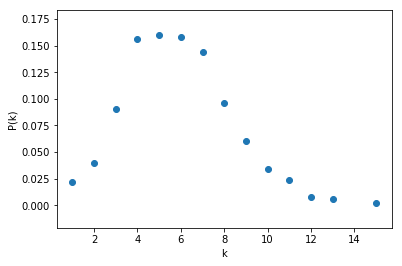

In [477]:
plt.scatter(s_er_kk[0], s_er_kk[1]/np.sum(s_er_kk[1]))
plt.xlabel('k')
plt.ylabel('P(k)')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0, 10)
plt.show()

In [482]:
np.average(s_er_k[:,1])

5.868

#### Clustering coefficient

In [483]:
l_sample=500

In [484]:
clustering_er=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_er=nx.Graph()
    er_mask=random.rand(smaller_max_link_number)<p_er_smaller
    for v in range(smaller_example_size-1):
        for w in range(v+1, smaller_example_size):
            if er_mask[counter]:
                s_er.add_edge(v, w)
            counter+=1
    clustering_er[s]=nx.average_clustering(s_er)

In [486]:
np.average(clustering_er)

0.011882735873031475

In [487]:
np.std(clustering_er)

0.0023648443778393883

##### Summarising

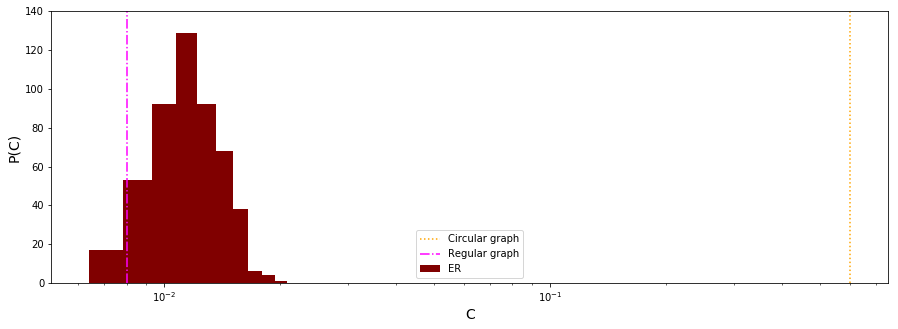

In [1273]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er, label='ER', color='maroon')
plt.plot([smaller_circular_c, smaller_circular_c],[0, 200], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_c, smaller_regular_c],[0, 200], label='Regular graph', linestyle='-.', color='magenta')
plt.legend()
plt.xlabel('C', fontsize=14)
plt.ylabel('P(C)', fontsize=14)
plt.xscale('log')
plt.ylim(0, 140)
plt.savefig('../Images/er_reg_clustering.png')
plt.show()

#### Average Shortest Path Length

In [531]:
apl_er=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_er=nx.Graph()
    er_mask=random.rand(smaller_max_link_number)<p_er_smaller
    for v in range(smaller_example_size-1):
        for w in range(v+1, smaller_example_size):
            if er_mask[counter]:
                s_er.add_edge(v, w)
            counter+=1
    try:
        apl_er[s]=nx.average_shortest_path_length(s_er)
    except:
        s_er_lcc=max(nx.connected_components(s_er), key=len)
        s_er_lcc=s_er.subgraph(s_er_lcc).copy()
        apl_er[s]=nx.average_shortest_path_length(s_er_lcc)

In [532]:
np.average(apl_er)

3.6635665586034185

In [533]:
np.std(apl_er)

0.046208604195220195

##### Summarising

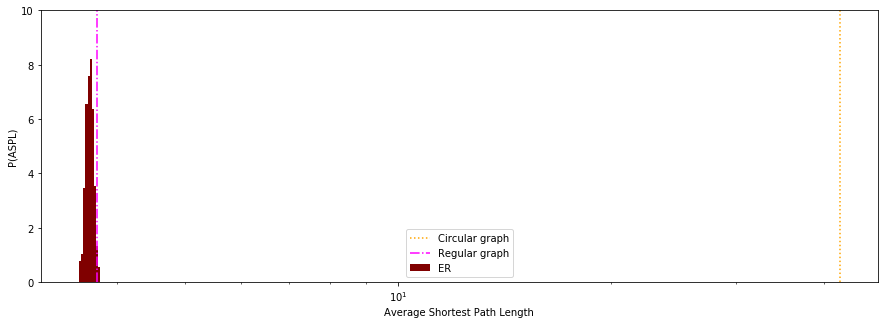

In [1244]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, density=1, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 10], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 10], label='Regular graph', linestyle='-.', color='magenta')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
plt.xscale('log')
plt.ylim(0,10)
plt.savefig('../Images/er_reg_ASPL.png')
plt.show()

## Watts-Strogatz (small world)

### Exercise: implement your own Watts-Strogatz graph
and plot the resulting graphs at varying the probability, from p=0.1 to p=1. (choose n=20 and k=6).

##### Hint

In [72]:
ws_0=circular.copy()

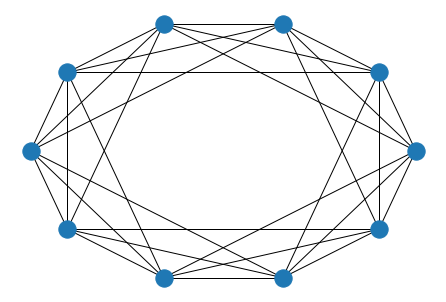

In [77]:
nx.draw_kamada_kawai(ws_0)

##### Solution

In [333]:
def ws_graph(p, ln, k):
    ws_0=nx.circulant_graph(ln, range(1, 1+int(k/2)))
    le=ws_0.number_of_edges()
    ws_mask=np.random.random(2*le)<p
    
    counter=0
    for i in range(ln-1):
        neigh=np.sort(ws_0[i])
        for j in neigh:
            if ws_mask[counter]:
                
                ws_0.remove_edge(i,j)
                
                new_j=np.random.choice(ln)
                while new_j in ws_0[i] or i==new_j:
                    new_j=np.random.choice(ln)
                ws_0.add_edge(i, new_j)
                
            counter+=1
    return ws_0

In [111]:
p=[i*10**-1 for i in range(10)]

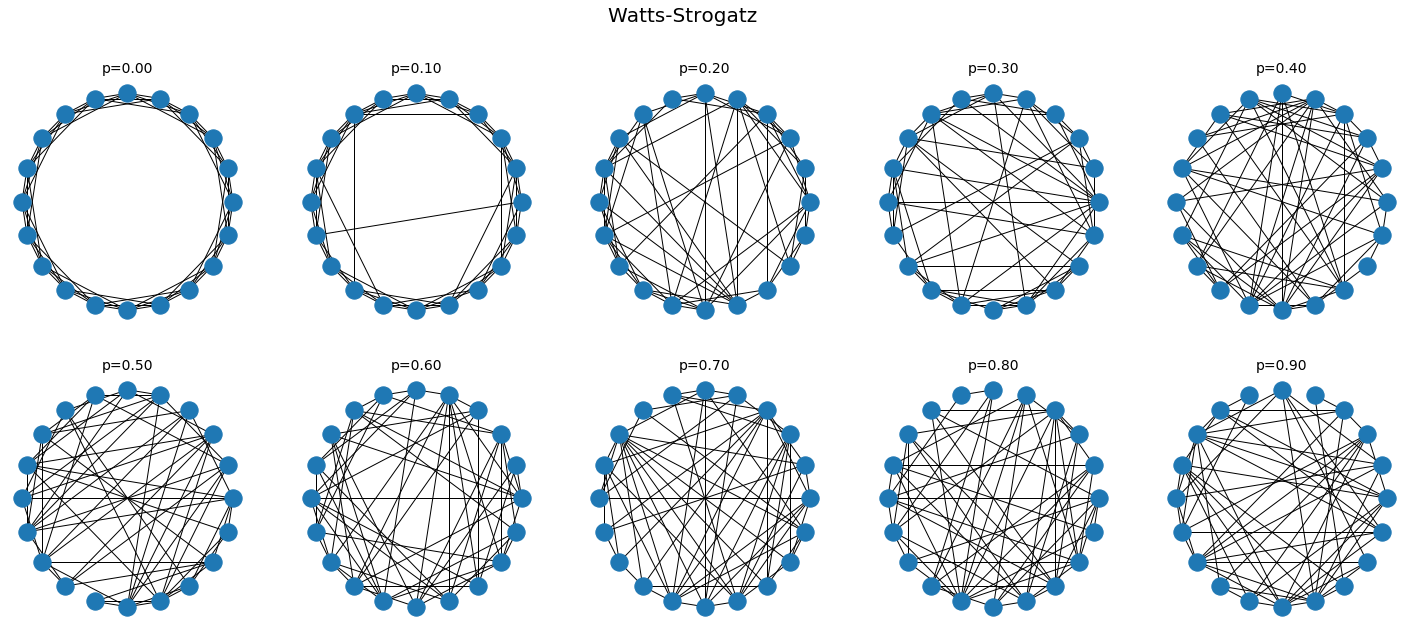

In [1282]:
fig, ax_lst = plt.subplots(2, 5, figsize=(25,10))
fig.suptitle('Watts-Strogatz', fontsize=20)
# cancel the frame
p=[i*10**-1 for i in range(10)]
for t in notebook.tqdm(enumerate(p)):
    x=(t[0])//5
    y=(t[0])%5
    
    G=ws_graph(t[1], 20, 6)
    nx.draw_circular(G, ax=ax_lst[x, y])
    
    ax_lst[x,y].set_title('p={:.2f}'.format(t[1]), fontsize=14)
    ax_lst[x,y].axis('off')
    # cancel the frame
plt.savefig('../Images/ws_n_20_k_6.png')
plt.show()

### Let's focus again on greater examples
But still smaller than the real network.  
Actually... there is even the networkx function...

In [1288]:
ws_vec=[nx.connected_watts_strogatz_graph(500, 6, p=10**(-p/2)) for p in range(6,-1, -1)]

In [352]:
p_ws=[10**(-p/2) for p in range(6,-1, -1)]

The choice is intended to have 1 dot between $10^n$ and $10^{n+1}$.

In [1283]:
len(p_ws)

7

In [1284]:
p_ws

[0.001,
 0.0031622776601683794,
 0.01,
 0.03162277660168379,
 0.1,
 0.31622776601683794,
 1.0]

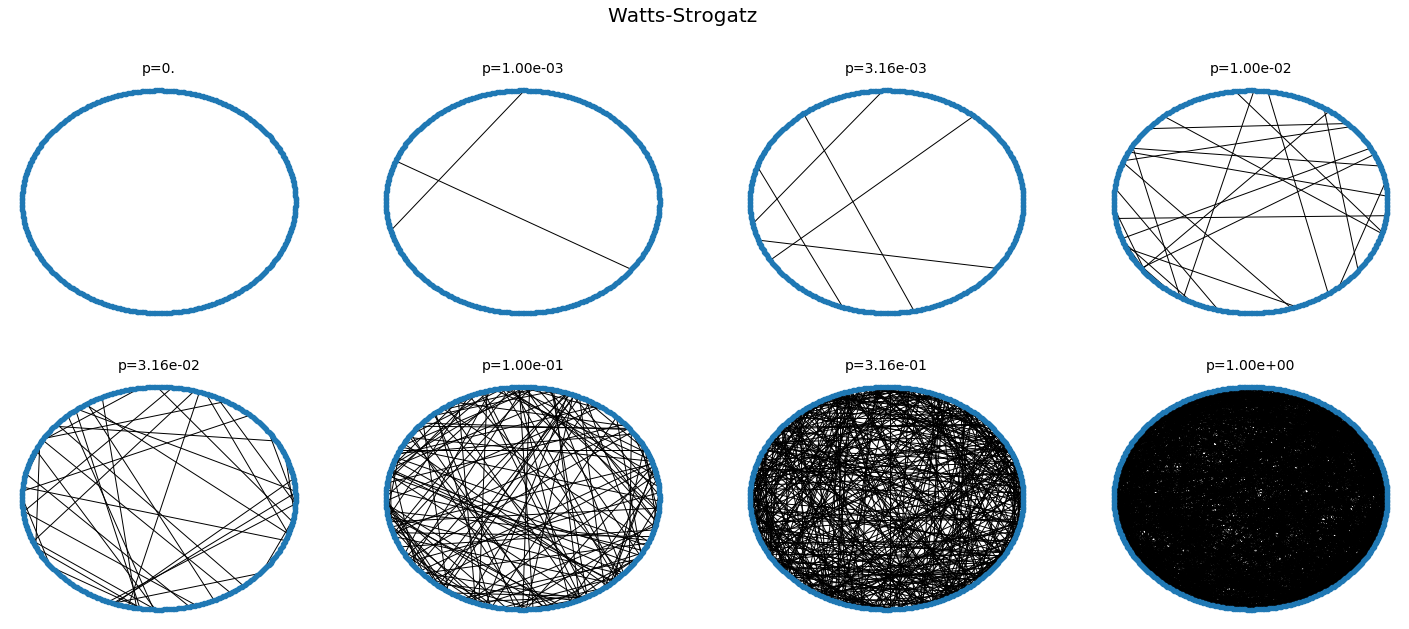

In [1289]:
fig, ax_lst = plt.subplots(2, 4, figsize=(25,10))
fig.suptitle('Watts-Strogatz', fontsize=20)
# cancel the frame
for t in range(len(p_ws)+1):
    x=(t)//4
    y=(t)%4
    
    if t!=0:

        nx.draw_circular(ws_vec[t-1], ax=ax_lst[x, y], node_size=20)
        ax_lst[x,y].set_title('p={:.2e}'.format(p_ws[t-1]), fontsize=14)
        
    else:
        nx.draw_circular(circular, ax=ax_lst[x, y], node_size=20)    
        ax_lst[x,y].set_title('p=0.', fontsize=14)
        
    ax_lst[x,y].axis('off')
    # cancel the frame
plt.savefig('../Images/ws_n_500_k_6.png')
plt.show()

### Degree distribution

In [1290]:
ws_vec_k=np.array(ws_vec[3].degree())

In [1291]:
ws_vec_kk=np.unique(ws_vec_k[:,1], return_counts=True)

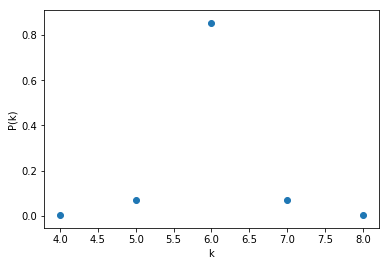

In [1292]:
plt.scatter(ws_vec_kk[0], ws_vec_kk[1]/np.sum(ws_vec_kk[1]))
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()

In [1293]:
titles=['p={:.2e}'.format(p) for p in p_ws]

In [1294]:
titles

['p=1.00e-03',
 'p=3.16e-03',
 'p=1.00e-02',
 'p=3.16e-02',
 'p=1.00e-01',
 'p=3.16e-01',
 'p=1.00e+00']

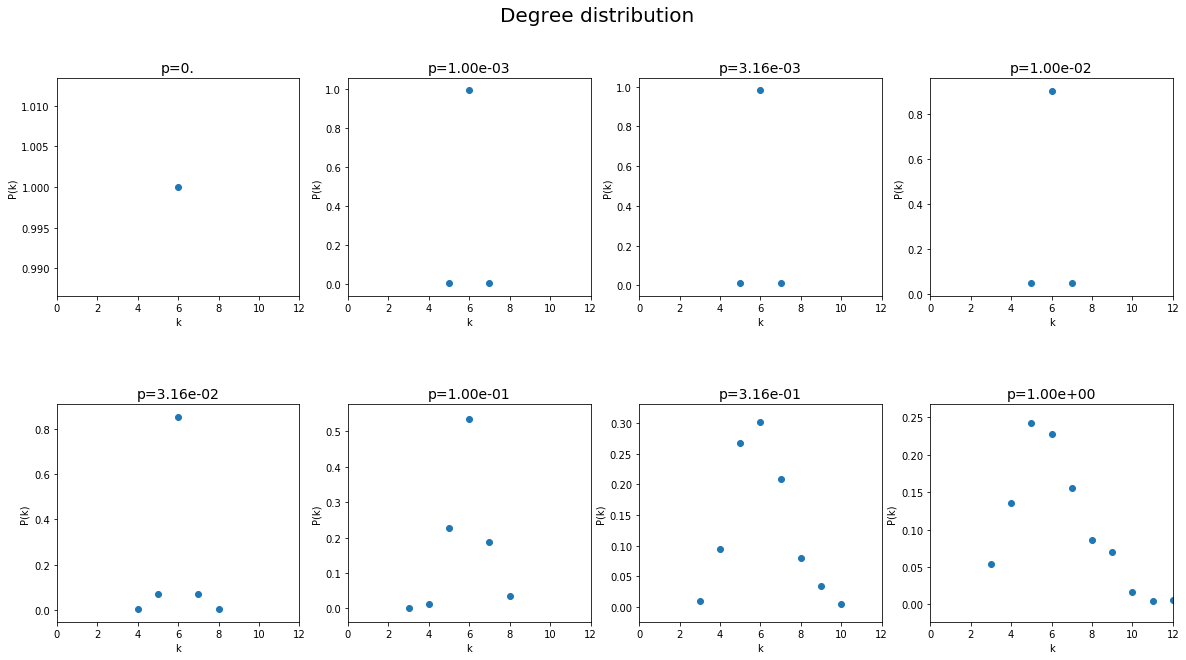

In [1295]:
fig, ax_lst = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle('Degree distribution', fontsize=20)

for t in range(8):
    y=t%4
    x=t//4
    if t!=0:
        ax_lst[x,y].set_title(titles[t-1], fontsize=14)
    
        ws_vec_k=np.array(ws_vec[t-1].degree())
        ws_vec_kk=np.unique(ws_vec_k[:,1], return_counts=True)
    
        ax_lst[x,y].scatter(ws_vec_kk[0], ws_vec_kk[1]/np.sum(ws_vec_kk[1]))
    else:
        ax_lst[x,y].set_title('p=0.', fontsize=14)
    
        ws_vec_k=np.array(circular.degree())
        ws_vec_kk=np.unique(ws_vec_k[:,1], return_counts=True)
    
        ax_lst[x,y].scatter(ws_vec_kk[0], ws_vec_kk[1]/np.sum(ws_vec_kk[1]))
    
        
    ax_lst[x,y].set_xlabel('k')
    ax_lst[x,y].set_ylabel('P(k)')
    ax_lst[x,y].set_xlim(0, 12)
    
plt.subplots_adjust(hspace=0.5)
# increase the space between the axis
plt.show()

### Clustering coefficient

In [362]:
ws_vec_ac=[nx.average_clustering(ws) for ws in ws_vec]

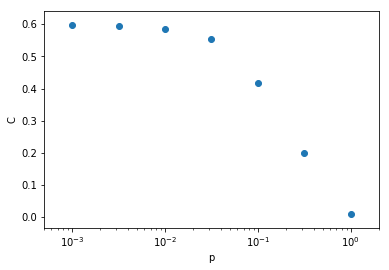

In [1296]:
plt.scatter(p_ws, np.array(ws_vec_ac))
plt.xlabel('p')
plt.ylabel('C')
plt.xscale('log')
plt.xlim(5*10**-4, 2)
plt.show()

#### Actually...
It is a random model, thus we should consider the distribution over several realizations.

In [580]:
ppp=0.3

In [581]:
clustering_ws_03=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    clustering_ws_03[s]=nx.average_clustering(s_ws)

In [561]:
ppp=0.1

In [562]:
clustering_ws_01=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    clustering_ws_01[s]=nx.average_clustering(s_ws)

In [563]:
ppp=0.01

In [564]:
clustering_ws_001=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    clustering_ws_001[s]=nx.average_clustering(s_ws)

In [582]:
np.average(clustering_ws_03)

0.21531480106560139

In [565]:
np.average(clustering_ws_01)

0.4445138086580083

In [566]:
np.average(clustering_ws_001)

0.58315192063492

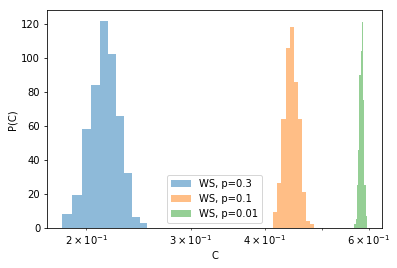

In [592]:
plt.hist(clustering_ws_03, bins=10, label='WS, p=0.3', alpha=0.5)
plt.hist(clustering_ws_01, bins=10, label='WS, p=0.1', alpha=0.5)
plt.hist(clustering_ws_001, bins=10, label='WS, p=0.01', alpha=0.5)
plt.legend()
plt.xlabel('C')
plt.ylabel('P(C)')
plt.xscale('log')
plt.savefig('../Images/ws_clustering.png')
plt.show()

#### Summarising

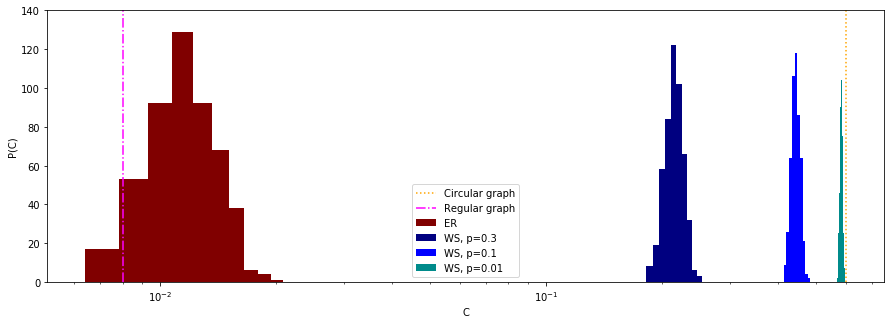

In [1272]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er,  label='ER', color='maroon')
plt.plot([smaller_circular_c, smaller_circular_c],[0, 140], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_c, smaller_regular_c],[0, 140], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(clustering_ws_03,  label='WS, p=0.3', color='navy')
plt.hist(clustering_ws_01,  label='WS, p=0.1', color='blue')
plt.hist(clustering_ws_001, label='WS, p=0.01', color='darkcyan')
#for t in enumerate(titles):
#    plt.plot([ws_vec_ac[t[0]],ws_vec_ac[t[0]]],[0, 200], label='WS'+t[1], linestyle='--')
plt.legend()
plt.xlabel('C')
plt.ylabel('P(C)')
plt.xscale('log')
plt.ylim(0, 140)
plt.savefig('../Images/ws_er_reg_clustering.png')
plt.show()

### Average Shortest Path Length

In [365]:
ws_vec_aspl=[nx.average_shortest_path_length(ws) for ws in ws_vec]

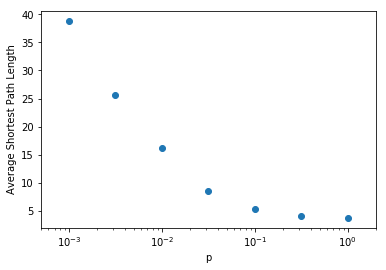

In [1298]:
plt.scatter(p_ws, np.array(ws_vec_aspl))
plt.xlabel('p')
plt.ylabel('Average Shortest Path Length')
plt.xscale('log')
plt.xlim(5*10**-4, 2)
plt.show()

#### Again...
It is a random model, thus we should consider the distribution over several realizations. 
Since the Average Shortest Path Length is quite a heavy computation and since we saw that the distribution are indeed quite narrow, we will not plot the distribution of the values of the ASPL for a sample of WS networks.
For your information, the calculation below took nearly 12 minutes on the server...

In [561]:
ppp=0.1

In [585]:
aspl_ws_01=np.zeros(l_sample)

for s in notebook.tqdm(range(l_sample)):
    counter=0
    s_ws=nx.connected_watts_strogatz_graph(500, 6, ppp)
    aspl_ws_01[s]=nx.average_shortest_path_length(s_ws)

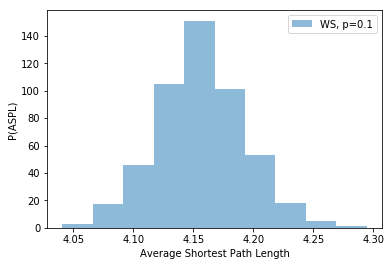

In [588]:
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', alpha=0.5)
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
plt.show()

#### Exercise: Average Shortest Path Length vs. Clustering

Reproduce the figure in the slides by Rossana:
![](../Images/ws_clustering_vs_ASPL.png)

##### Solution

In [366]:
ws_aspl_norm=nx.average_shortest_path_length(circular)

In [363]:
ws_ac_norm=nx.average_clustering(circular)

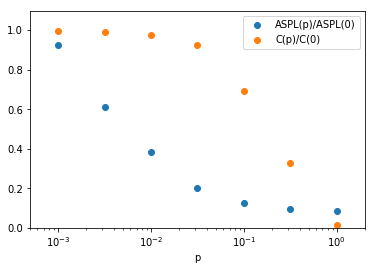

In [1300]:
plt.scatter(p_ws, np.array(ws_vec_aspl)/ws_aspl_norm, label='ASPL(p)/ASPL(0)')
plt.scatter(p_ws, np.array(ws_vec_ac)/ws_ac_norm, label='C(p)/C(0)')
plt.legend()
plt.xlabel('p')
plt.xscale('log')
plt.xlim(5*10**-4, 2)
plt.ylim(0, 1.1)
plt.savefig('../Images/ws_clustering_vs_ASPL.png')
plt.show()

#### Summarising

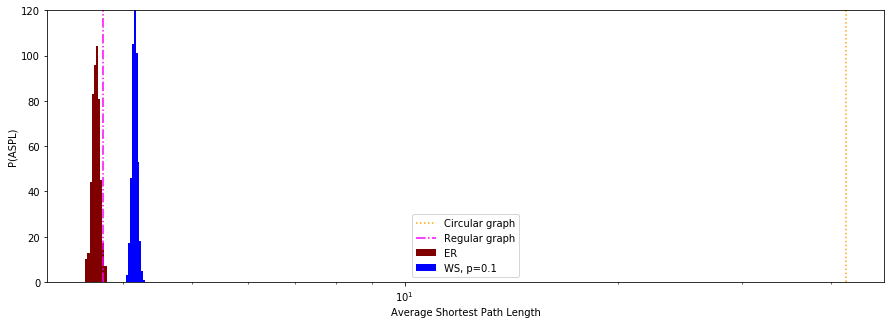

In [1250]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 150], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 150], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
plt.xscale('log')
plt.ylim(0,120)
plt.savefig('../Images/ws_er_reg_ASPL.png')
plt.show()

## Barabasi-Albert

### Exercise: implement your own Barabasi-Albert

##### Hint

In the module _random_ is present a function that permits to sample according to some weights: random.choice

In [ ]:
random.choice()

In [816]:
n=500
m_0=5

In [1178]:
def BA(n, m_0):
    # Let's start with an empty graph with m nodes 
    # (actually, the inital conditions are not crucial for the main properties of a BA-model)
    ba_g=nx.empty_graph(m_0)
    # The first move is sort of automatic:
    ba_g.add_edges_from([(m_0,node) for node in range(m_0)])

    for node in range(m_0+1, n):
        ba_g_ds=np.array(ba_g.degree())
        p_BA=(ba_g_ds[:, 1])/(2*ba_g.number_of_edges())
        winners=random.choice(node, size=5, p=p_BA, replace=False)
        for i in winners:
            ba_g.add_edge(i,node)
    return ba_g

In [1179]:
ba_g=BA(lv, 5)

#### Solution

##### Check: degree distribution

In [1180]:
bant_k=np.array(ba_g.degree())

In [1181]:
bant_kk=np.unique(bant_k[:,1], return_counts=True)

In [1183]:
alpha_BA=-3.
c_BA=bant_kk_nx[1][20]/(bant_kk_nx[0][20]**alpha_BA)

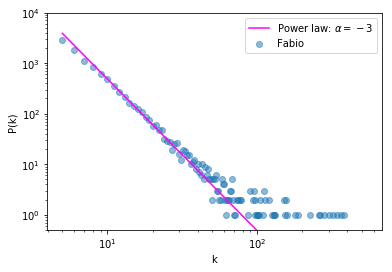

In [1306]:
plt.scatter(bant_kk[0], bant_kk[1], label='Fabio', alpha=0.5)
plt.plot(bant_kk_nx[0], bant_kk_nx[0]**alpha_BA*c_BA, label=r'Power law: $\alpha=-3$', color='magenta') 
plt.legend()
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')
plt.ylim(5*10**-1, 10**4)
plt.show()

### Actually...

Even in this case, networkx has its own function...

In [936]:
ba_net=nx.barabasi_albert_graph(500, 5)

In [1007]:
%timeit BA(500, 5)

320 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [971]:
%timeit nx.barabasi_albert_graph(500, 5)

9.76 ms ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [937]:
ba_net.number_of_edges()

2475

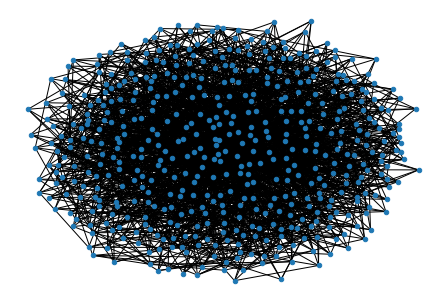

In [700]:
nx.draw_kamada_kawai(ba_net, node_size=20, widths=.2)

In [1081]:
ba_net_total=nx.barabasi_albert_graph(lv, 5)

In [915]:
ba_net_total.number_of_edges()

49360

### Degree distribution

In [1082]:
bant_k_nx=np.array(ba_net_total.degree())

In [1083]:
bant_kk_nx=np.unique(bant_k_nx[:,1], return_counts=True)

Let's compare the distribution obtained with the method above and the one by networkX:

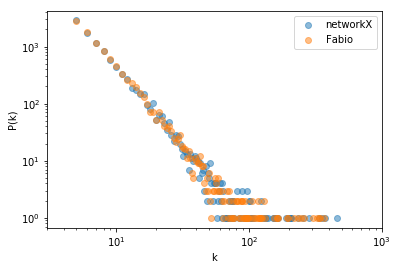

In [1072]:
plt.scatter(bant_kk_nx[0], bant_kk_nx[1], label='networkX', alpha=0.5)
plt.scatter(bant_kk[0], bant_kk[1], label='Fabio', alpha=0.5)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(3, 10**3)
plt.show()

The theoretical distribution fits the data:

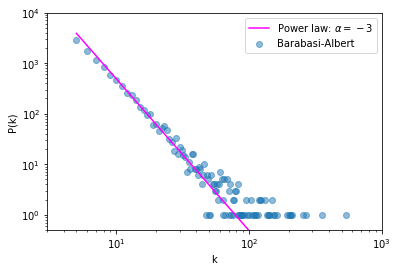

In [1307]:
plt.scatter(bant_kk_nx[0], bant_kk_nx[1], label='Barabasi-Albert', alpha=0.5)
plt.plot(bant_kk_nx[0], bant_kk_nx[0]**alpha_BA*c_BA, label=r'Power law: $\alpha=-3$', color='magenta') 
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(3, 10**3)
plt.ylim(5*10**-1, 10**4)
plt.show()

Actually, in the case of smaller networks, the distribution is not so evident due to the finite size effects.

In [705]:
ba_k=np.array(ba_net.degree())

In [706]:
ba_kk=np.unique(ba_k[:,1], return_counts=True)

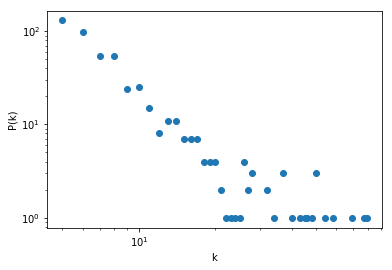

In [707]:
plt.scatter(ba_kk[0], ba_kk[1])
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Clustering coefficient

In [994]:
len_sample=500

In [941]:
ba_net.number_of_nodes()

500

Theoretical expectation

In [943]:
def BA_th_c(n, m):
    return (np.log(n))**2/n

In [944]:
BA_th_c(500, 5)

0.07724270763394936

In [938]:
nx.average_clustering(ba_net)

0.05429551096661666

In [1076]:
clustering_ba_500_5_nx=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=nx.barabasi_albert_graph(500, 5)
    clustering_ba_500_5_nx[i]=nx.average_clustering(cacca)

Let's check if the previous version worked properly:

In [996]:
clustering_ba_500_5=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=BA(500, 5)
    clustering_ba_500_5[i]=nx.average_clustering(cacca)

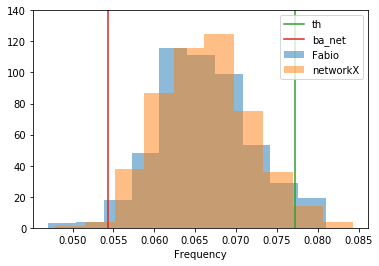

In [1301]:
plt.hist(clustering_ba_500_5, label='Fabio', alpha=0.5)
plt.hist(clustering_ba_500_5_nx, label='networkX', alpha=0.5)
plt.plot([BA_th_c(500, 5),BA_th_c(500, 5)],[0, 140], label='th')
plt.plot([nx.average_clustering(ba_net),nx.average_clustering(ba_net)],[0, 140], label='ba_net')
plt.legend()
plt.ylim(0, 140)
plt.xlabel('C')
plt.xlabel('Frequency')
plt.show()

#### Summarising

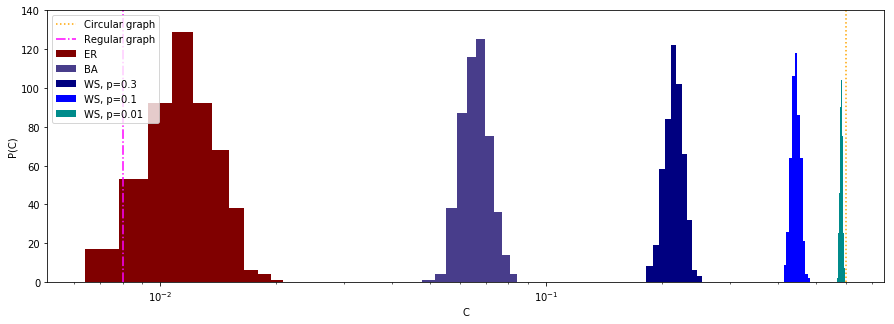

In [1267]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er,  label='ER', color='maroon')
plt.plot([smaller_circular_c, smaller_circular_c],[0, 140], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_c, smaller_regular_c],[0, 140], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(clustering_ba_500_5_nx, label='BA', color='darkslateblue')
plt.hist(clustering_ws_03,  label='WS, p=0.3', color='navy')
plt.hist(clustering_ws_01,  label='WS, p=0.1', color='blue')
plt.hist(clustering_ws_001, label='WS, p=0.01', color='darkcyan')
#for t in enumerate(titles):
#    plt.plot([ws_vec_ac[t[0]],ws_vec_ac[t[0]]],[0, 200], label='WS'+t[1], linestyle='--')
plt.legend()
plt.xlabel('C')
plt.ylabel('P(C)')
plt.xscale('log')
plt.ylim(0, 140)
plt.savefig('../Images/ba_ws_er_reg_clustering.png')
plt.show()

In [945]:
BA_th_c(lv, 5)

0.008565611380135127

In [916]:
nx.average_clustering(ba_net_total)

0.006997115278449833

### Average Shortest Path Length

**!!!! DO NOT RE-EVALUATE THE FOLLOWING CELL!!!!**

In [783]:
nx.average_shortest_path_length(ba_net_total)

3.6422568266059736

In [854]:
nx.average_shortest_path_length(ba_net)

2.7839839679358716

In [968]:
def BA_th_aspl(n, m):
    return (np.log(n))/np.log(np.log(n))

In [ ]:
aspl_ba_500_5_nx=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=nx.barabasi_albert_graph(500, 5)
    aspl_ba_500_5_nx[i]=nx.nx.average_shortest_path_length(cacca)

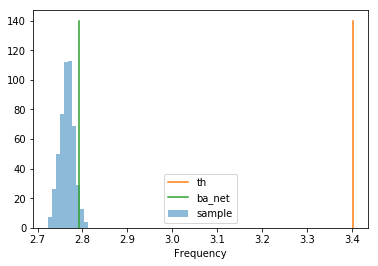

In [1309]:
plt.hist(aspl_ba_500_5_nx, label='sample', alpha=0.5)
plt.plot([BA_th_aspl(500, 5),BA_th_aspl(500, 5)],[0, 140], label='th')
plt.plot([nx.average_shortest_path_length(ba_net),nx.average_shortest_path_length(ba_net)],[0, 140], label='ba_net')
plt.legend()
plt.xlabel('ASPL')
plt.xlabel('Frequency')
plt.savefig('../Images/ba_aspl_distribution.png')
plt.show()

#### Summarising

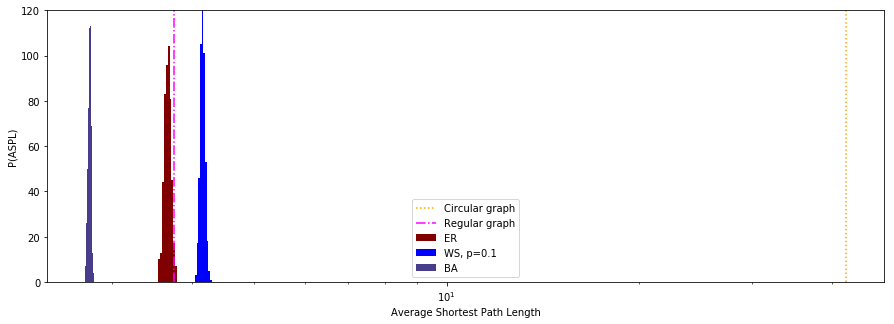

In [1251]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 150], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 150], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.hist(aspl_ba_500_5_nx, label='BA', color='darkslateblue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
plt.xscale('log')
plt.ylim(0,120)
plt.savefig('../Images/ba_ws_er_reg_ASPL.png')
plt.show()

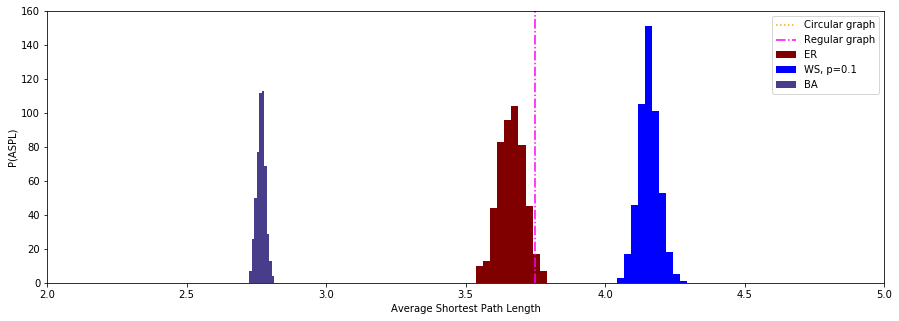

In [1261]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 170], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 170], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.hist(aspl_ba_500_5_nx, label='BA', color='darkslateblue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
#plt.xscale('log')
plt.ylim(0,160)
plt.xlim(2,5)
plt.savefig('../Images/ba_ws_er_reg_ASPL_zoom.png')
plt.show()

## Bianconi-Barabasi

### Exercise: implement the Bianconi-Barabasi model

Implement a flat distributed fitness...

#### Solution

In [1239]:
def BB_flat(n, m_0):
    # Let's start with an empty graph with m nodes 
    # (actually, the inital conditions are not crucial for the main properties of a BA-model)
    bb_g=nx.empty_graph(m_0)
    # The first move is sort of automatic:
    bb_g.add_edges_from([(m_0,node) for node in range(m_0)])
    fitnesses=random.rand(m_0+1)
    
    
    for node in range(m_0+1, n):
        bb_g_ds=np.array(bb_g.degree())
        p_BB_flat=bb_g_ds[:, 1]*fitnesses
        p_BB_flat=p_BB_flat/np.sum(p_BB_flat)
        #print('p_BB_flat={0:}, fitnesses={1:}'.format(p_BB_flat, fitnesses))
        winners=random.choice(node, size=5, p=p_BB_flat, replace=False)
        for i in winners:
            bb_g.add_edge(i,node)
        fitnesses=np.concatenate((fitnesses, random.rand(1)))
    return bb_g

In [1212]:
%timeit BB_flat(500, 5)

287 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Not even that slow...

In [1213]:
bb_net=BB_flat(500,5)

In [1216]:
bb_net_total=BB_flat(lv, 5)

##### Check: degree distribution

In [1217]:
bbnt_k=np.array(bb_net_total.degree())

In [1218]:
bbnt_kk=np.unique(bbnt_k[:,1], return_counts=True)

In [1235]:
alpha_BB_flat=-2.255
#alpha_BB_flat=-3.
c_BB_flat=bbnt_kk[1][20]/(bbnt_kk[0][20]**alpha_BB_flat/np.log(bbnt_kk[0][20]))

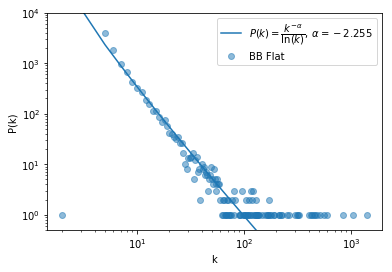

In [1238]:
#plt.scatter(bant_kk_nx[0], bant_kk_nx[1], label='BA', alpha=0.5)
plt.scatter(bbnt_kk[0], bbnt_kk[1], label='BB Flat', alpha=0.5)
#plt.plot(bant_kk_nx[0], bant_kk_nx[0]**alpha_BA*c_BA, label=r'BA Power law fit $\alpha=-3.$')
plt.plot(bbnt_kk[0], bbnt_kk[0]**alpha_BB_flat*c_BB_flat/np.log(bbnt_kk[0]), label=r'$P(k)=\dfrac{k^{-\alpha}}{\ln(k)},\,\alpha=-2.255$')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(5*10**-1, 10**4)
plt.show()

### Actually...
... in this case there is no networkX help!

### Clustering

In [1059]:
len_sample=500

500

In [1276]:
clustering_bb_500_5_nx=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=BB_flat(500, 5)
    clustering_bb_500_5_nx[i]=nx.average_clustering(cacca)

#### Summarising

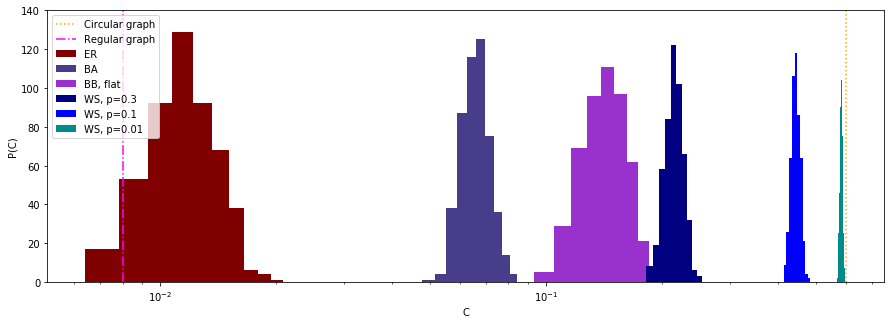

In [1277]:
plt.figure(figsize=(15,5))
plt.hist(clustering_er,  label='ER', color='maroon')
plt.plot([smaller_circular_c, smaller_circular_c],[0, 140], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_c, smaller_regular_c],[0, 140], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(clustering_ba_500_5_nx, label='BA', color='darkslateblue')
plt.hist(clustering_bb_500_5_nx, label='BB, flat', color='darkorchid')
plt.hist(clustering_ws_03,  label='WS, p=0.3', color='navy')
plt.hist(clustering_ws_01,  label='WS, p=0.1', color='blue')
plt.hist(clustering_ws_001, label='WS, p=0.01', color='darkcyan')
plt.legend()
plt.xlabel('C')
plt.ylabel('P(C)')
plt.xscale('log')
plt.ylim(0, 140)
plt.savefig('../Images/bb_ba_ws_er_reg_clustering.png')
plt.show()

### Average Shortest Path Length

In [1263]:
len_sample=500

In [1264]:
aspl_bb_500_5=np.zeros(len_sample)
for i in notebook.tqdm(range(len_sample)):
    cacca=BB_flat(500, 5)
    aspl_bb_500_5[i]=nx.average_shortest_path_length(cacca)

#### Summarising

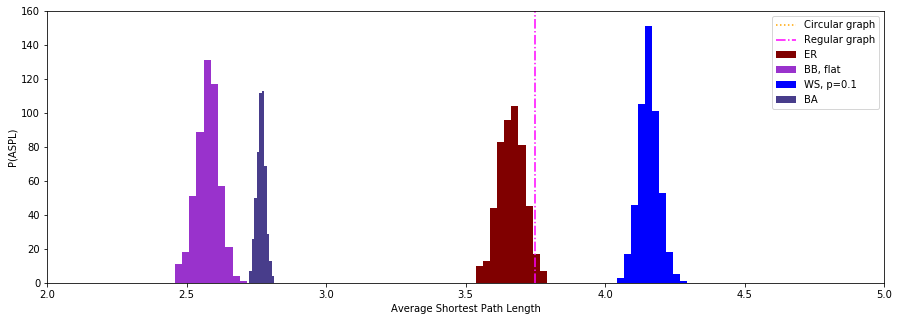

In [1275]:
plt.figure(figsize=(15,5))
plt.hist(apl_er, label='ER', color='maroon')
plt.plot([smaller_circular_apl, smaller_circular_apl],[0, 170], label='Circular graph', linestyle='dotted', color='orange')
plt.plot([smaller_regular_apl, smaller_regular_apl],[0, 170], label='Regular graph', linestyle='-.', color='magenta')
plt.hist(aspl_bb_500_5, label='BB, flat', color='darkorchid')
plt.hist(aspl_ws_01, bins=10, label='WS, p=0.1', color='blue')
plt.hist(aspl_ba_500_5_nx, label='BA', color='darkslateblue')
plt.legend()
plt.xlabel('Average Shortest Path Length')
plt.ylabel('P(ASPL)')
#plt.xscale('log')
plt.ylim(0,160)
plt.xlim(2,5)
plt.savefig('../Images/bb_ba_ws_er_reg_ASPL_zoom.png')
plt.show()